In [182]:
import pandas as pd
import xgboost as xgb

輸入資料

In [243]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_0.35.csv')
normalized_test = pd.read_csv('../result/all_beta_normalized_test_0.35.csv')
data = pd.read_csv('../result/result_basic_dbeta_0.35.csv')
# cluster_3 =pd.read_csv('../result/wards_cluster/gene_clusters_3.csv')
# cluster_3 = data[data['gene'].isin(cluster_3['Gene'])]
normalized_test.iloc[:,1::2]

1         3         5         7         9        11        13  \
0    0.292910  0.251303  0.259736  0.220520  0.226304  0.298249  0.138489   
1    0.504081  0.562472  0.537165  0.482329  0.297942  0.491629  0.030803   
2    0.266061  0.203968  0.346129  0.484779  0.140203  0.259590  0.258358   
3    0.101333  0.053834  0.111712  0.213167  0.044492  0.217699  0.029426   
4    0.192771  0.218550  0.222275  0.105394  0.136350  0.266800  0.076736   
..        ...       ...       ...       ...       ...       ...       ...   
383  0.636432  0.601080  0.601533  0.618051  0.694110  0.616002  0.640217   
384  0.208498  0.138297  0.116383  0.314152  0.149281  0.261979  0.050924   
385  0.390416  0.261428  0.460477  0.563726  0.242932  0.341535  0.060503   
386  0.217920  0.166269  0.149325  0.108480  0.219687  0.168032  0.045800   
387  0.192525  0.117515  0.188937  0.198048  0.128059  0.218602  0.099006   

           15        17        19  ...       881       883       885  \
0    0.235039  0.367948  0.124742  ...  0.733207  0.810674  0.629002   
1    0.386002  0.585600  0.022948  ...  0.723715  0.752477  0.852899   
2    0.220757  0.383337  0.185810  ...  0.761176  0.688994  0.115207   
3    0.038408  0.269802  0.025210  ...  0.668870  0.884092  0.657520   
4    0.156491  0.329107  0.050355  ...  0.382588  0.732401  0.828865   
..        ...       ...       ...  ...       ...       ...       ...   
383  0.653861  0.572717  0.669432  ...  0.736951  0.275192  0.838349   
384  0.069373  0.205124  0.073435  ...  0.761813  0.692560  0.036539   
385  0.205171  0.413382  0.075660  ...  0.752106  0.846101  0.844377   
386  0.172276  0.172534  0.042655  ...  0.759461  0.521102  0.890626   
387  0.096021  0.259893  0.077212  ...  0.836304  0.462601  0.603143   

          887       889       891       893       895       897       899  
0    0.631744  0.489297  0.620474  0.587984  0.725763  0.543097  0.627478  
1    0.700420  0.650097  0.773014  0.681243  0.699969  0.720280  0.715946  
2    0.604455  0.587466  0.222561  0.729291  0.815345  0.728010  0.208163  
3    0.776370  0.573960  0.702896  0.742537  0.722355  0.619104  0.588905  
4    0.671343  0.626758  0.701276  0.531955  0.759788  0.750459  0.119129  
..        ...       ...       ...       ...       ...       ...       ...  
383  0.748779  0.375831  0.266343  0.066786  0.140803  0.088238  0.692029  
384  0.800069  0.738585  0.828333  0.544486  0.544360  0.772482  0.279021  
385  0.775128  0.699578  0.782909  0.618947  0.439943  0.730439  0.613598  
386  0.859935  0.798389  0.819541  0.664653  0.159496  0.679142  0.696239  
387  0.855260  0.674205  0.748411  0.582827  0.729388  0.359674  0.523566  

[388 rows x 450 columns]

In [244]:
normalized_train_c = pd.merge(normalized_train, normalized_test, on = "Unnamed: 0")
# normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]
# normalized_train_c = normalized_train_c[normalized_train_c['Unnamed: 0'].isin(cluster_3['Unnamed: 0'])]
normalized_train_c.iloc[:,1::2]

1_x       3_x       5_x       7_x       9_x      11_x      13_x  \
0    0.229817  0.079642  0.180363  0.182330  0.156993  0.174448  0.170768   
1    0.291908  0.030616  0.219142  0.228138  0.164601  0.270818  0.199887   
2    0.232184  0.261523  0.176360  0.253273  0.083640  0.160268  0.255767   
3    0.029336  0.031738  0.052790  0.075713  0.052144  0.058213  0.056716   
4    0.091505  0.066134  0.126135  0.094016  0.039025  0.152960  0.102249   
..        ...       ...       ...       ...       ...       ...       ...   
383  0.764122  0.802018  0.681363  0.733171  0.763387  0.705546  0.547487   
384  0.121275  0.081696  0.110688  0.171446  0.112948  0.134949  0.153037   
385  0.091843  0.136124  0.203644  0.195833  0.143594  0.238066  0.209942   
386  0.038796  0.026578  0.066475  0.086785  0.027398  0.074352  0.074157   
387  0.092637  0.031542  0.077886  0.175964  0.070239  0.106416  0.105940   

         15_x      17_x      19_x  ...     881_y     883_y     885_y  \
0    0.283547  0.299189  0.173554  ...  0.733207  0.810674  0.629002   
1    0.375387  0.458393  0.213409  ...  0.723715  0.752477  0.852899   
2    0.303536  0.293903  0.222740  ...  0.761176  0.688994  0.115207   
3    0.066261  0.170566  0.056618  ...  0.668870  0.884092  0.657520   
4    0.141194  0.188816  0.097161  ...  0.382588  0.732401  0.828865   
..        ...       ...       ...  ...       ...       ...       ...   
383  0.602316  0.632164  0.740336  ...  0.736951  0.275192  0.838349   
384  0.237831  0.285269  0.091441  ...  0.761813  0.692560  0.036539   
385  0.229587  0.364792  0.156817  ...  0.752106  0.846101  0.844377   
386  0.110486  0.311376  0.056696  ...  0.759461  0.521102  0.890626   
387  0.261032  0.337599  0.142312  ...  0.836304  0.462601  0.603143   

        887_y     889_y       891       893       895       897       899  
0    0.631744  0.489297  0.620474  0.587984  0.725763  0.543097  0.627478  
1    0.700420  0.650097  0.773014  0.681243  0.699969  0.720280  0.715946  
2    0.604455  0.587466  0.222561  0.729291  0.815345  0.728010  0.208163  
3    0.776370  0.573960  0.702896  0.742537  0.722355  0.619104  0.588905  
4    0.671343  0.626758  0.701276  0.531955  0.759788  0.750459  0.119129  
..        ...       ...       ...       ...       ...       ...       ...  
383  0.748779  0.375831  0.266343  0.066786  0.140803  0.088238  0.692029  
384  0.800069  0.738585  0.828333  0.544486  0.544360  0.772482  0.279021  
385  0.775128  0.699578  0.782909  0.618947  0.439943  0.730439  0.613598  
386  0.859935  0.798389  0.819541  0.664653  0.159496  0.679142  0.696239  
387  0.855260  0.674205  0.748411  0.582827  0.729388  0.359674  0.523566  

[388 rows x 895 columns]

In [264]:
X_train = normalized_train_c.iloc[:, 1::2]

x = []

for i in range(895):
    X = X_train.iloc[:, i]

    X = X.values.flatten().T.tolist()
    print(X)
    x.append(X)

y = [ (0 if (i < 47)or(i>444 and i <495 ) else 1)   for i in range(895)]
y.count(1)

[0.229816513761468, 0.291907975134159, 0.232183908045977, 0.0293363714041584, 0.0915049816465653, 0.05370670995671, 0.142394822006472, 0.0598320917583067, 0.0383959044368601, 0.12198559348575, 0.0584831380733292, 0.100923545653623, 0.248870164687859, 0.14317614606594, 0.0673360427125667, 0.0276088425523699, 0.105481142051463, 0.0526907630522088, 0.0564265755976405, 0.11117188568303, 0.0829338446788111, 0.0696517412935323, 0.0274843182568504, 0.883153715258083, 0.0924376920450666, 0.127524429967427, 0.0874951355558438, 0.110653138871275, 0.0986358866736621, 0.111047180667434, 0.0798459887647542, 0.0319507082512863, 0.0552278820375335, 0.232323232323232, 0.0929197384893587, 0.115180063820088, 0.0922519913106445, 0.0998147967638171, 0.0454509209791883, 0.0272300469483568, 0.0617695025822234, 0.079294738827079, 0.0622713738834538, 0.0578848325178773, 0.0245200698080279, 0.0824026562028373, 0.245563286685951, 0.0705340977670489, 0.0383516931864545, 0.0992771084337349, 0.149641000247586, 0.0

798

In [202]:
x

[[0.0293363714041584,
  0.142394822006472,
  0.0564265755976405,
  0.0622713738834538,
  0.0844647013188518,
  0.0756670902160102,
  0.043045625414609,
  0.048495973472288,
  0.258615645661459,
  0.102262773722628,
  0.104660783232212,
  0.0583982202447164,
  0.0556421830118999,
  0.126703096539162,
  0.731142014327855,
  0.378091073158291,
  0.90497909752623,
  0.69557770018329,
  0.0335745311285853,
  0.0999146512639417,
  0.108352924683563,
  0.0866695229108967,
  0.0690258552054047,
  0.0843985604814197,
  0.0541591050799418,
  0.311247334738559,
  0.78549595646319,
  0.114275108678722,
  0.739117892409324,
  0.154897512645599,
  0.0642144919848006,
  0.746848948949654,
  0.663986226297228,
  0.193402366875211,
  0.274575951685206,
  0.784482411023677,
  0.106314508806897,
  0.791926244716761,
  0.0943999863033563,
  0.0918425422351926,
  0.0387964361397421],
 [0.0317381601785272,
  0.0612473721093203,
  0.117163321248563,
  0.0267751073745774,
  0.0220335339638865,
  0.09007562069

In [ ]:
from sklearn.model_selection import cross_val_score

# 將數據轉換為DMatrix格式
dmatrix = xgb.DMatrix(x, label=y)

# 定義模型參數
params = {
    'objective': 'binary:logistic',  # 二分類問題
    'eval_metric': 'logloss',  # 評估指標
    'max_depth': 3,
    'learning_rate': 1
}

# 建立模型
model = xgb.XGBClassifier(**params)

# 進行交叉驗證，這裡使用 5-fold 交叉驗證
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# 印出每次交叉驗證的準確度
print("各次交叉驗證的準確度:", cv_scores)

# 計算平均準確度
average_accuracy = cv_scores.mean()
print("平均交叉驗證準確度:", average_accuracy)


In [ ]:
from itertools import combinations

target_labels = ['cg03520644','cg05047401','cg06355129','cg07790615','cg09106903']

# 三個一組
combinations_list = list(combinations(target_labels, 3))

acc=[]
# 所有可能的組合
for combination in combinations_list:
    #print(combination)
    d1_values = normalized_train.loc[normalized_train['Unnamed: 0']==combination[0]]
    d2_values = normalized_train.loc[normalized_train['Unnamed: 0']==combination[1]]
    d3_values = normalized_train.loc[normalized_train['Unnamed: 0']==combination[2]]
   
    d1 = d1_values.iloc[:, 1::2]
    d2 = d2_values.iloc[:, 1::2]
    d3 = d3_values.iloc[:, 1::2]

    d1 = d1.values.flatten().tolist()
    d2 = d2.values.flatten().tolist()
    d3 = d3.values.flatten().tolist()

    x = []

    for i in range(445):
        x.append([d1[i],d2[i],d3[i]])
        
    # 將數據轉換為DMatrix格式
    dmatrix = xgb.DMatrix(x, label=y)

    # 定義模型參數
    params = {
        'objective': 'binary:logistic',  # 二分類問題
        'eval_metric': 'logloss',  # 評估指標
        'max_depth': 3,
        'learning_rate': 1
    }

    # 建立模型
    model = xgb.XGBClassifier(**params)

    # 進行交叉驗證，這裡使用 5-fold 交叉驗證
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

    # 印出每次交叉驗證的準確度
    #print("各次交叉驗證的準確度:", cv_scores)

    # 計算平均準確度
    average_accuracy = cv_scores.mean()
    #print("平均交叉驗證準確度:", average_accuracy)
    acc.append([combination[0],combination[1], combination[2], cv_scores[0],cv_scores[1],cv_scores[2],cv_scores[3],cv_scores[4], average_accuracy])


In [ ]:
df=pd.DataFrame(acc, columns=['ID1', 'ID2', 'ID3', 'fold_scores1','fold_scores2','fold_scores3','fold_scores4','fold_scores5', 'average_accuracy'])
df.to_csv("../result/xgb.csv", index=False)

使用RFECV決定最佳選擇位點數  
RFE 篩選到剩下RFECV決定的最佳選擇位點數，可得知最好的是哪一個位點、預測精準度

In [260]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFECV,RFE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

第1群  
第2群  
第3群
* Decision Tree無法找到平衡點
* XGBoost:樣本數20個
* Random Forest
* Logistic Regression:樣本數11個
* SVM:樣本數10個  
只取用XGBoost、RF、LR、SVM實驗 樣本數20個~30個 >>準確度範圍最小  
接續取用 LR、SVM實驗 樣本數11~30 >>LR AUC介於0.96~0.97、SVM AUC皆為0.96  
當中LR在挑選剩下19個特徵時，AUC=0.97 最高  

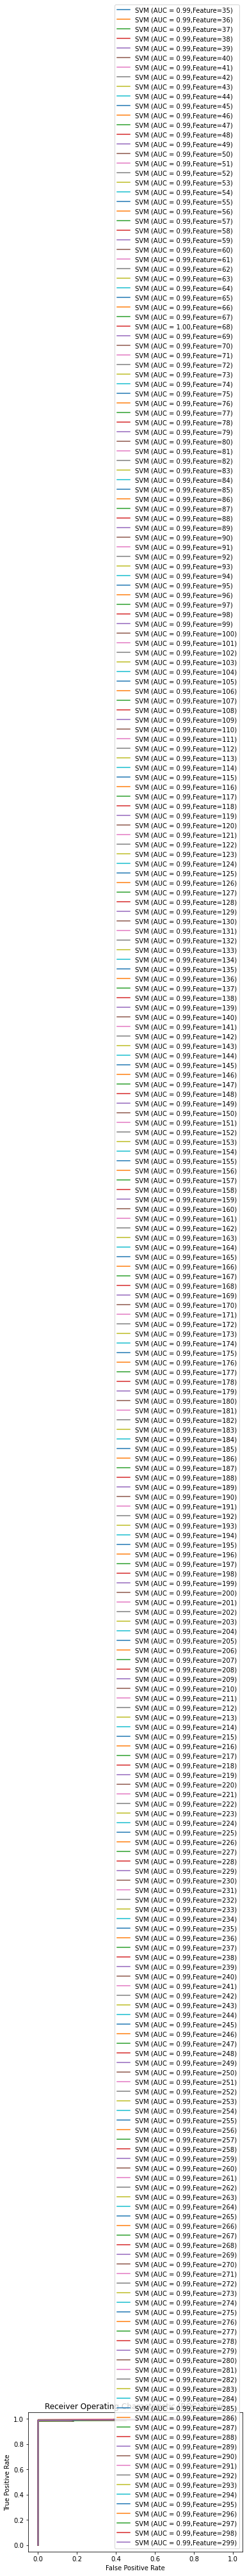

    Model Features  Accuracy    Recall  Test Accuracy  \
0     SVM       35  0.987424  0.981366       0.983240   
1     SVM       36  0.987424  0.981366       0.983240   
2     SVM       37  0.987424  0.981366       0.983240   
3     SVM       38  0.987424  0.981366       0.983240   
4     SVM       39  0.987424  0.981366       0.983240   
..    ...      ...       ...       ...            ...   
260   SVM      295  0.990218  0.987578       0.988827   
261   SVM      296  0.990218  0.987578       0.988827   
262   SVM      297  0.990218  0.987578       0.988827   
263   SVM      298  0.990218  0.987578       0.988827   
264   SVM      299  0.990218  0.987578       0.988827   

     Train Accuracy (Cross-Validation)  difference  f1_score  
0                             0.991608    0.008368  0.990596  
1                             0.991608    0.008368  0.990596  
2                             0.991608    0.008368  0.990596  
3                             0.991608    0.008368  0.990596  


In [262]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'SVM': SVC(),
    # 'Logistic Regression': LogisticRegression(),#11
    # 'Decision Tree': DecisionTreeClassifier(),#淘汰，過擬合
    # 'Random Forest': RandomForestClassifier(),
    # 'XGBoost': XGBClassifier()#20
}

results = pd.DataFrame(columns=['Model', 'Features'])
feature_counts = [i for i in range(35,300)]
# feature_counts = [3]
svc = SVC(kernel="linear")
model=svc

# logreg_clf = LogisticRegression()
# model=logreg_clf

# dt_clf = DecisionTreeClassifier()
# model=dt_clf


# rf_clf = RandomForestClassifier()
# model=rf_clf


# xgb_clf = XGBClassifier()
# model=xgb_clf

for feature_count in feature_counts:
    
    # 使用 RFE 選擇特徵
    rfe = RFE(estimator=model, n_features_to_select=feature_count)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    selected_feature_indices = rfe.support_
    X_train_df = pd.DataFrame(X_train)
    selected_feature_names = pd.DataFrame(normalized_train_c.iloc[selected_feature_indices,0])
    feature_ranking = rfe.ranking_
    #print("Feature Ranking:\n", feature_ranking)

    for test_model_name,_ in models.items():
        if (test_model_name=="SVM"):
            svc = SVC(kernel="linear")
            test_model=svc

        elif (test_model_name=="Logistic Regression"):
            logreg_clf = LogisticRegression()
            test_model=logreg_clf

        elif (test_model_name=="Random Forest"):
            rf_clf = RandomForestClassifier()
            test_model=rf_clf

        else:
            xgb_clf = XGBClassifier()
            test_model=xgb_clf

        test_model.fit(X_train_rfe, y_train)
        # 計算訓練集上的準確度 (使用交叉驗證)
        train_accuracy_cv = cross_val_score(test_model, X_train_rfe, y_train, cv=5, scoring='accuracy').mean()
        # 繪製決策樹
        # plt.figure(figsize=(12, 8))
        # plot_tree(model, filled=True, feature_names=X_train_df.columns)
        # plt.title(f"{model_name} Decision Tree with {feature_count} Features")
        # plt.show()

        # 在測試集上進行預測
        X_test_rfe = rfe.transform(X_test)
        y_pred = test_model.predict(X_test_rfe)

        accuracy_test = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        results = results.append({'Model': test_model_name, 'Features': feature_count,'Recall':recall,'f1_score':f1,'Accuracy':(train_accuracy_cv+accuracy_test)/2,'Train Accuracy (Cross-Validation)': train_accuracy_cv, 'Test Accuracy': accuracy_test,'difference':train_accuracy_cv-accuracy_test}, ignore_index=True)

        # results = results.append({'Model': model_name, 'Features': feature_count, 'Accuracy': accuracy_test}, ignore_index=True)
        # print('Selected Features:',selected_feature_names)
        # 計算 ROC 曲線的參數
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        # 繪製 ROC 曲線
        plt.plot(fpr, tpr, label=f'{test_model_name} (AUC = {roc_auc:.2f},Feature={feature_count})')

# 添加圖例
plt.legend(loc="lower right")

# 添加標籤
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")

# 顯示圖表
plt.show()



# 顯示結果
print(results)


In [250]:
grouped_data = results.groupby('Model')['Accuracy'].sum().reset_index()

print(grouped_data)

                 Model  Accuracy
0        Decision Tree  3.953897
1  Logistic Regression  3.957374
2        Random Forest  3.965056
3                  SVM  3.951795
4              XGBoost  3.953897


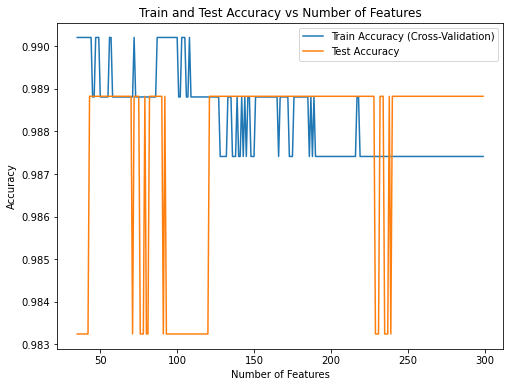

In [258]:
import matplotlib.pyplot as plt

model_results = results[results['Model']=="Logistic Regression"]

plt.figure(figsize=(8, 6))
plt.plot(model_results['Features'], model_results['Train Accuracy (Cross-Validation)'], label='Train Accuracy (Cross-Validation)')
plt.plot(model_results['Features'], model_results['Test Accuracy'], label='Test Accuracy')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Number of Features')

plt.legend()

plt.show()


In [ ]:
results.to_csv("../result/RFE&ml.csv",index=False)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=None, random_state=42)

models = {
    # 'SVM': SVC(), #4 fold=5
    # 'Logistic Regression': LogisticRegression(), #5 fold=5
    # 'Decision Tree': DecisionTreeClassifier(), #3
    # 'Random Forest': RandomForestClassifier(), #355
    'XGBoost': XGBClassifier() #2
}


# 開始迴圈測試
for model_name, model in models.items():
    if model_name=='SVM':
            svc = SVC(kernel="linear")
            model=svc

    elif model_name=='Logistic Regression':
        logreg_clf = LogisticRegression()
        model=logreg_clf

    elif model_name=='Decision Tree':
        dt_clf = DecisionTreeClassifier()
        model=dt_clf

    elif model_name=='Random Forest':
        rf_clf = RandomForestClassifier()
        model=rf_clf

    elif model_name=='XGBoost':
        xgb_clf = XGBClassifier()
        model=xgb_clf

    # for fold in range(2,11):
        # 初始化 StratifiedKFold
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        print(stratified_kfold.get_n_splits(x, y))

        # 初始化RFECV，cv參數是交叉驗證的次數，可以選擇StratifiedKFold或其他交叉驗證方法
        rfecv = RFECV(estimator=model, step=1, cv=stratified_kfold, scoring='accuracy')
        X_train_rfecv = rfecv.fit(x, y)

        # for i, (train_index, test_index) in enumerate(stratified_kfold.split(x, y)):
            # print(f"Fold {i}:")
            # print(f"  Train: index={train_index}")
            # print(f"  Test:  index={test_index}")


        print("Optimal Number of Features:", X_train_rfecv.n_features_)
        # print("Feature Rankings:", X_train_rfecv.ranking_)
        # print("Feature Select:",X_train_rfecv.support_)
        print("cross validation acc",max(X_train_rfecv.grid_scores_))

        # 绘制特征排名的图表
        plt.plot(range(1, len(X_train_rfecv.grid_scores_) + 1), X_train_rfecv.grid_scores_, label=f"Fold {fold}")
        

    # 繪製特徵排名的圖表
    import matplotlib.pyplot as plt

    # plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation score (accuracy)")
    # plt.plot(range(1, len(X_train_rfecv.grid_scores_) + 1), X_train_rfecv.grid_scores_)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pd.DataFrame(X_train).to_csv("../result/traindata.csv",index=False)

In [ ]:
print(pd.DataFrame(x).shape,pd.DataFrame(y).shape)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 初始化模型
model = XGBClassifier()  # 请替换成你实际使用的模型

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 初始化 StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 进行交叉验证并绘制AUC-ROC曲线
for train_index, test_index in stratified_kfold.split(x, y):
    X_train_fold, X_val_fold = pd.DataFrame(x).iloc[train_index], pd.DataFrame(x).iloc[test_index]
    y_train_fold, y_val_fold = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
    print([X_val_fold])

    # 使用 RFE 選擇特徵
    rfe = RFE(estimator=model, n_features_to_select=3)
    X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)



    # 训练模型
    model.fit(X_train_rfe, y_train_fold)

    # 获取模型预测的概率
    y_val_prob = model.predict_proba([X_val_fold])[:, 1]

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# 设置图表标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 初始化模型
model = SVC(probability=True)  # 请替换成你实际使用的模型

# 将数据分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 初始化 StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 进行交叉验证并绘制AUC-ROC曲线
for train_index, test_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = pd.DataFrame(x).iloc[train_index], pd.DataFrame(x).iloc[test_index]
    y_train_fold, y_val_fold = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
    print("X_val_fold:",X_val_fold)
    # 训练模型
    model.fit(X_train_fold, y_train_fold)

    # 获取模型预测的概率
    y_val_prob = model.predict_proba(X_val_fold)[:, 1]

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# 设置图表标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()
